# Scaling

## Import Libraries

We will start by importing the libraries we need for this lesson.

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

#Libraries for processing data
import pandas as pd
import numpy as np

#Import libraries for graphing
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for obtaining data from SQL databse
import env
import os

#Import wrangle_zillow function to obtain data
from wrangle import wrangle_zillow

#Library for splitting data into train, validate, and split
from sklearn.model_selection import train_test_split

#Library needed for scaling the data
import sklearn.preprocessing

## Wrangling Zillow Data

We imported the `wrangle_zillow` function from the `wrangle.py` file, which acquires and cleans the Zillow data for single-family homes for sale in 2017 in Los Angeles, Orange, and Ventura County. Please see the `wrangle.py` file for more information about this function. We use that function to set up our DataFrame below.

In [2]:
df = wrangle_zillow()

We'll look at a sample of this DataFrame below.

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


## Splitting Zillow Data

We will use the `train_test_split` function we imported at the beginning of this lesson to split the data into `train`, `test`, and `split`.

In [4]:
train_and_validate, test = train_test_split(df, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

train.shape, test.shape, validate.shape

((1585736, 7), (245724, 7), (216237, 7))

## Min-Max Scaler

The min-max scalar scales our data according to the following formula:

 $$ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$

We will scale the following numerical features:
 - `bedroomcnt`,
 - `bathroomcnt`, and
 - `calculatedfinishedsquarefeet`.
 
We do not scale `taxvaluedollarcnt` because this feature will be our target variable once we start evaluating the data. The feature `taxamount` is derivative of `taxvaluedollarcnt`, so we do not scale that feature either. 

The features `yearbuilt` and `fips` are both categorical, so there is no need to scale those variables.

### Scale the Data

Below is our process for scaling the data.

In [131]:
#Create the object 
scaler_min_max = sklearn.preprocessing.MinMaxScaler()

#fit the object to learn the minimum and maximum value
scaler_min_max.fit(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

# use the object to transform the data
scaled_squareft_bedroom_count_and_bathroom_count = scaler_min_max.transform(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

#Look at a sample of the scaled values
scaled_squareft_bedroom_count_and_bathroom_count[:10]

array([[0.46434327, 0.6       , 0.54545455],
       [0.26450443, 0.2       , 0.18181818],
       [0.58440774, 0.6       , 0.54545455],
       [0.49818695, 0.6       , 0.45454545],
       [0.32695407, 0.4       , 0.36363636],
       [0.25402901, 0.4       , 0.18181818],
       [0.25564061, 0.4       , 0.36363636],
       [0.20507655, 0.        , 0.18181818],
       [0.24677679, 0.4       , 0.18181818],
       [0.18996777, 0.2       , 0.18181818]])

We will create new columns in the train DataFrame uses our scaled values.

In [132]:
#assign scaled values as new columns in the train dataset
train[['calculatedfinishedsquarefeet_scaled_min_max', 'bedroomcnt_scaled_min_max', 'bathroomcnt_scaled_min_max']] = scaled_squareft_bedroom_count_and_bathroom_count

Now we will look at a sample of our newly created DataFrame.

In [133]:
#Look at a sample of the new train dataset
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,calculatedfinishedsquarefeet_scaled_min_max,bedroomcnt_scaled_min_max,bathroomcnt_scaled_min_max
1562981,4.0,3.0,2306.0,618000.0,1988.0,7692.16,6037.0,0.464343,0.6,0.545455
1703392,2.0,1.0,1314.0,84938.0,1951.0,1794.55,6037.0,0.264504,0.2,0.181818
1243403,4.0,3.0,2902.0,680217.0,1964.0,8313.32,6037.0,0.584408,0.6,0.545455
988579,4.0,2.5,2474.0,524060.0,1977.0,5972.20,6059.0,0.498187,0.6,0.454545
403841,3.0,2.0,1624.0,506374.0,1952.0,6290.72,6037.0,0.326954,0.4,0.363636


We will now make new columns in the test and validate DataFrames using our scaled values.

In [134]:
#make new scaled columns for validate and test
test[['calculatedfinishedsquarefeet_scaled_min_max', 'bedroomcnt_scaled_min_max', 'bathroomcnt_scaled_min_max']] = scaler.transform(test[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])
validate[['calculatedfinishedsquarefeet_scaled_min_max', 'bedroomcnt_scaled_min_max', 'bathroomcnt_scaled_min_max']] = scaler.transform(validate[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

### Visualizations

We will now visualize the un-scaled and scaled distributions side-by-side to see the effect that the scaling had on the distributions of the data.

We set the color palette to `bright` so that our graphs are easier to see.

In [135]:
sns.set_palette("bright")

#### Square Feet

First we graph the distribution before and after scaling.

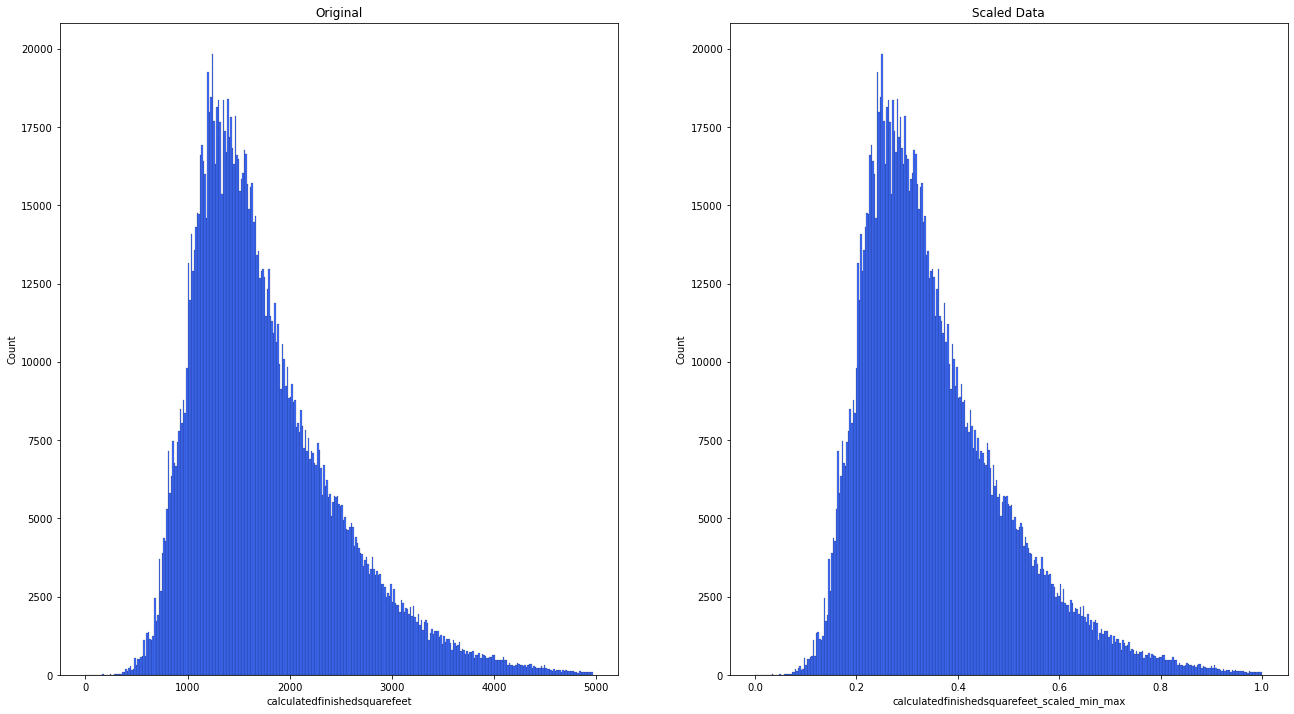

In [136]:
# Visualize the un-scaled and scaled distribution for square feet
plt.figure(figsize=(22, 12))

# subplot 1
plt.subplot(121)
sqft_original = sns.histplot(data = train, x = "calculatedfinishedsquarefeet").set(Title = "Original")

#subplot 2
plt.subplot(122)
sqft_scaled = sns.histplot(data = train, x = "calculatedfinishedsquarefeet_scaled_min_max").set(Title = "Scaled Data")

Now we will visualize the relationship between the un-scaled and scaled data.

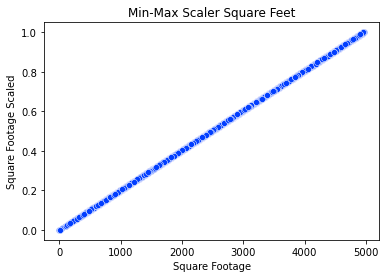

In [137]:
# Visualize the scaling square footage:
sns.scatterplot(x = train.calculatedfinishedsquarefeet, y = train.calculatedfinishedsquarefeet_scaled_min_max)
plt.xlabel('Square Footage')
plt.ylabel('Square Footage Scaled')
plt.title('Min-Max Scaler Square Feet');

As you can see, there appears to be a perfectly linear relationship between the scaled and un-scaled data.

#### Bedroom Count

We will graph the distribution of the data before and after scaling.

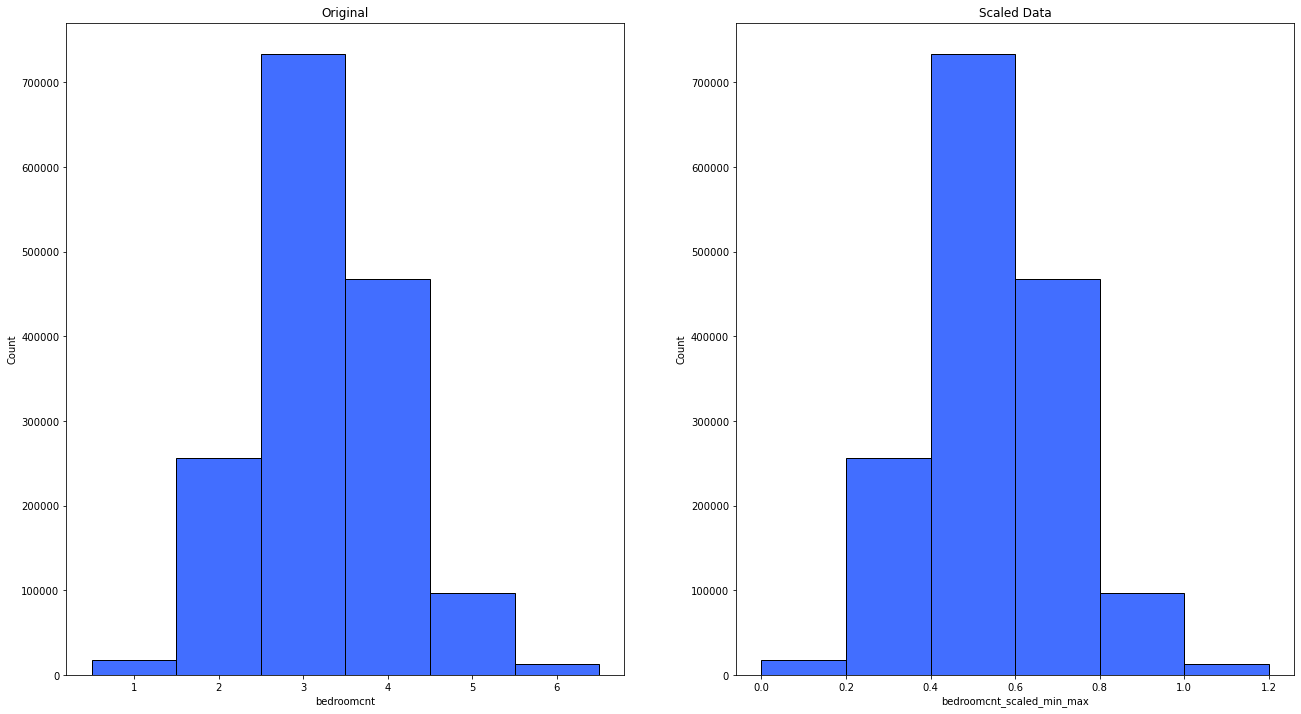

In [138]:
# Visualize the un-scaled and scaled distribution for square feet
plt.figure(figsize=(22, 12))

# subplot 1
plt.subplot(121)
sqft_original = sns.histplot(data = train, x = "bedroomcnt",  discrete = True).set(Title = "Original")

#subplot 2
plt.subplot(122)
sqft_scaled = sns.histplot(data = train, x = "bedroomcnt_scaled_min_max", binwidth = 0.2).set(Title = "Scaled Data")

Now we will visualize the relationship between the scaled and unscaled data.

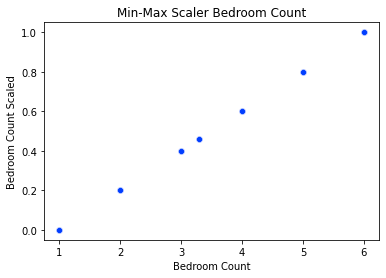

In [139]:
# Visualize the scaling square footage:
sns.scatterplot(x = train.bedroomcnt, y = train.bedroomcnt_scaled_min_max)
plt.xlabel('Bedroom Count')
plt.ylabel('Bedroom Count Scaled')
plt.title('Min-Max Scaler Bedroom Count');

There appears to be an exactly linear relationship between the scaled and unscaled data.

#### Bathroom Count

We will graph the distribution of the data before and after scaling.

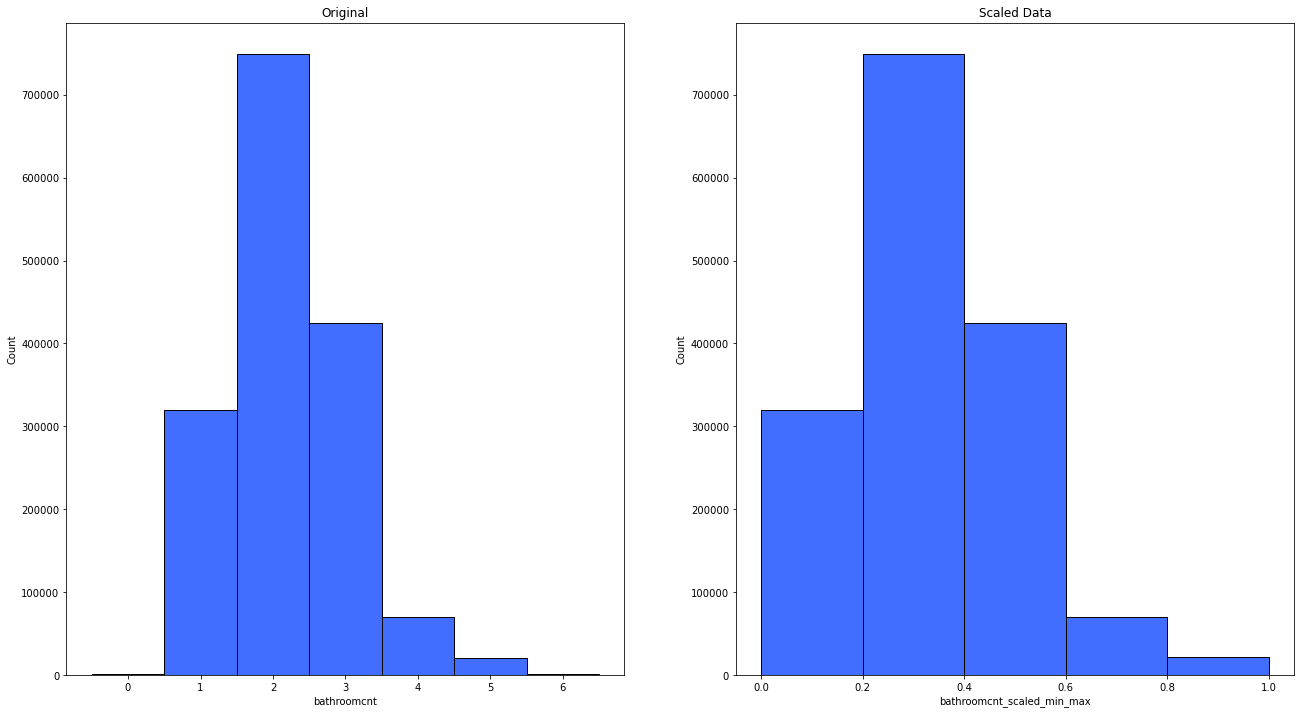

In [140]:
# Visualize the un-scaled and scaled distribution for bathroom count
plt.figure(figsize=(22, 12))

# subplot 1
plt.subplot(121)
sqft_original = sns.histplot(data = train, x = "bathroomcnt",  discrete = True).set(Title = "Original")

#subplot 2
plt.subplot(122)
sqft_scaled = sns.histplot(data = train, x = "bathroomcnt_scaled_min_max", binwidth = 0.2).set(Title = "Scaled Data")

We will now visualize the relationship between the scaled and unscaled data.

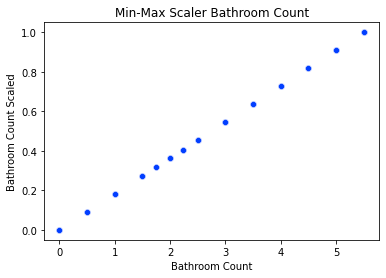

In [141]:
# Visualize the scaling square footage:
sns.scatterplot(x = train.bathroomcnt, y = train.bathroomcnt_scaled_min_max)
plt.xlabel('Bathroom Count')
plt.ylabel('Bathroom Count Scaled')
plt.title('Min-Max Scaler Bathroom Count');

The scaled and unscaled data are linearly correlated.

#### Distributions Before and After Scaling

We will plot the distributions of square feet, bedroom count, and bathroom count before and after scaling.

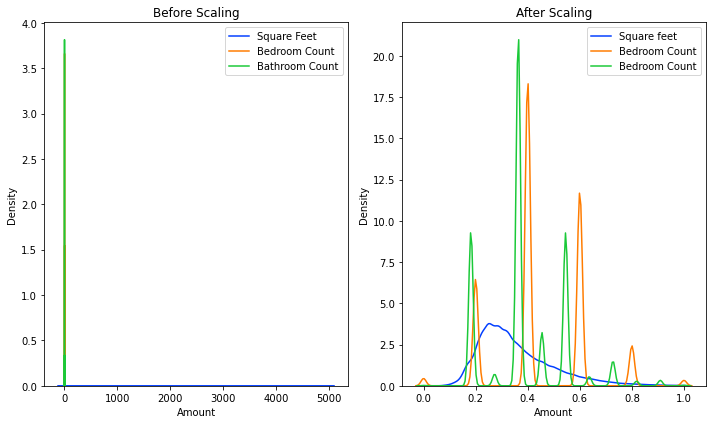

In [142]:
# Distribution of square feet before and after scaling:

plt.figure(figsize = (10,6))

plt.subplot(121)
sns.kdeplot(x = train.calculatedfinishedsquarefeet, label = 'Square Feet')
sns.kdeplot(x = train.bedroomcnt,label = 'Bedroom Count')
sns.kdeplot(x = train.bathroomcnt,label = 'Bathroom Count')
plt.xlabel('Amount')
plt.legend()
plt.title('Before Scaling')


plt.subplot(122)
sns.kdeplot(x = train.calculatedfinishedsquarefeet_scaled_min_max, label = 'Square feet')
sns.kdeplot(x = train.bedroomcnt_scaled_min_max,label = 'Bedroom Count')
sns.kdeplot(x = train.bathroomcnt_scaled_min_max,label = 'Bedroom Count')
plt.xlabel('Amount')
plt.title('After Scaling')
plt.legend()


plt.tight_layout()

The first graph is almost impossible to interpret because the scales of the data for each feature are so different. After scaling, however, we can easily the relationships between the three features. 

## Standard Scaler

This scaler transforms the data according to the following formula.


$$ x' = \frac{x - \bar{x}}{\sigma_x} $$

  $\mu = 0$ and $\sigma = 1$

###  Scale the Data

We scale the data using the Standard Scaler below.

In [144]:
# 1. create the object
scaler_standard = sklearn.preprocessing.StandardScaler()

# 2. fit the object
scaler_standard.fit(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

# 3. use the object. Scale total_bill only
train[['calculatedfinishedsquarefeet_scaled_standard', 'bedroomcnt_scaled_standard', 'bathroomcnt_scaled_standard']] = scaler_standard.transform(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])
test[['calculatedfinishedsquarefeet_scaled_standard', 'bedroomcnt_scaled_standard', 'bathroomcnt_scaled_standard']] = scaler_standard.transform(test[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])
validate[['calculatedfinishedsquarefeet_scaled_standard', 'bedroomcnt_scaled_standard', 'bathroomcnt_scaled_standard']] = scaler_standard.transform(validate[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

### Visualizations

#### Square Feet

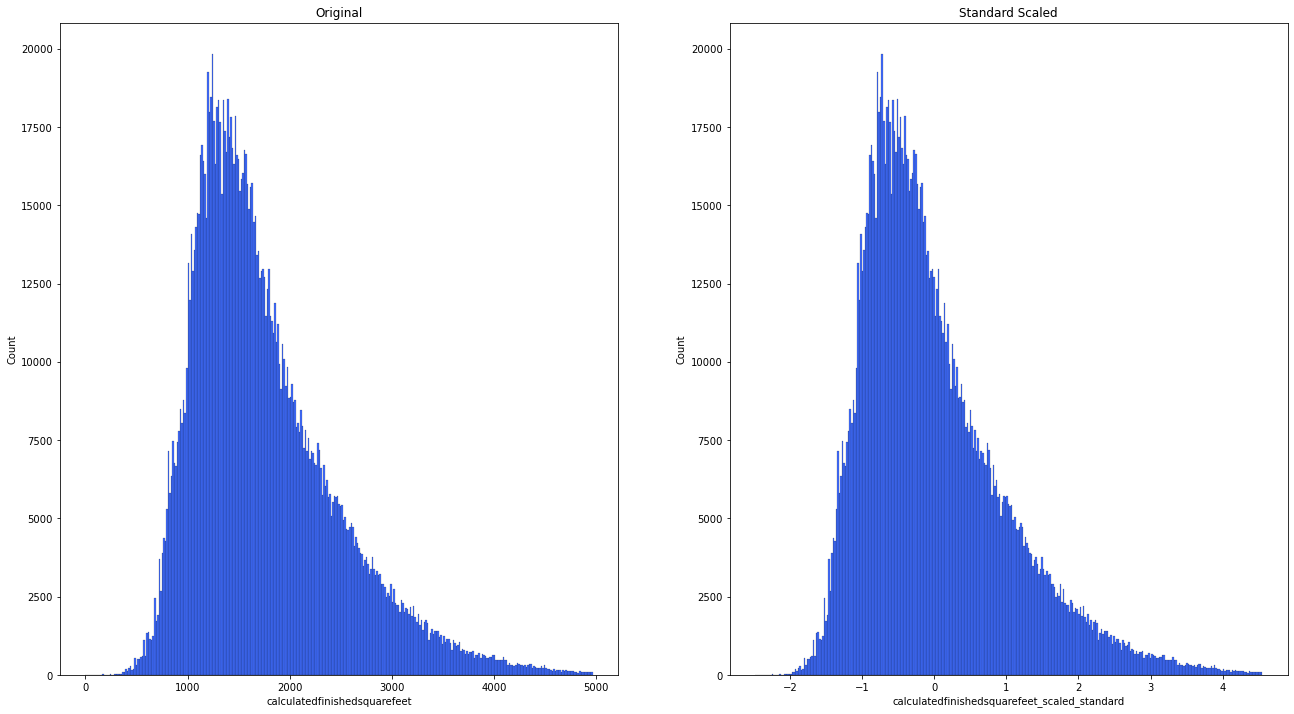

In [145]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(22, 12))

plt.subplot(121)
sns.histplot(train, x='calculatedfinishedsquarefeet').set(Title = "Original")

plt.subplot(122)
sns.histplot(train, x='calculatedfinishedsquarefeet_scaled_standard').set(Title = "Standard Scaled");

#### Bedroom Count

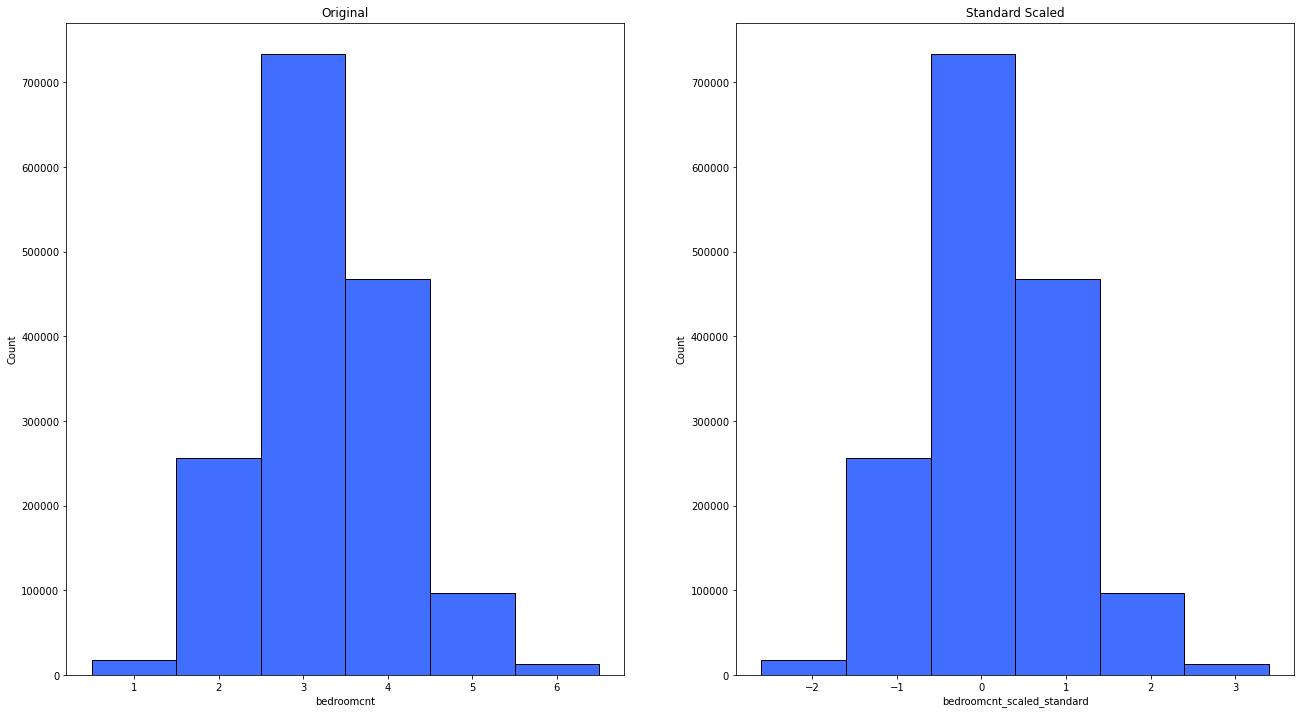

In [149]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(22, 12))

plt.subplot(121)
sns.histplot(train, x='bedroomcnt', discrete = True).set(Title = "Original")

plt.subplot(122)
sns.histplot(train, x='bedroomcnt_scaled_standard', binwidth = 1).set(Title = "Standard Scaled");

#### Bathroom Count

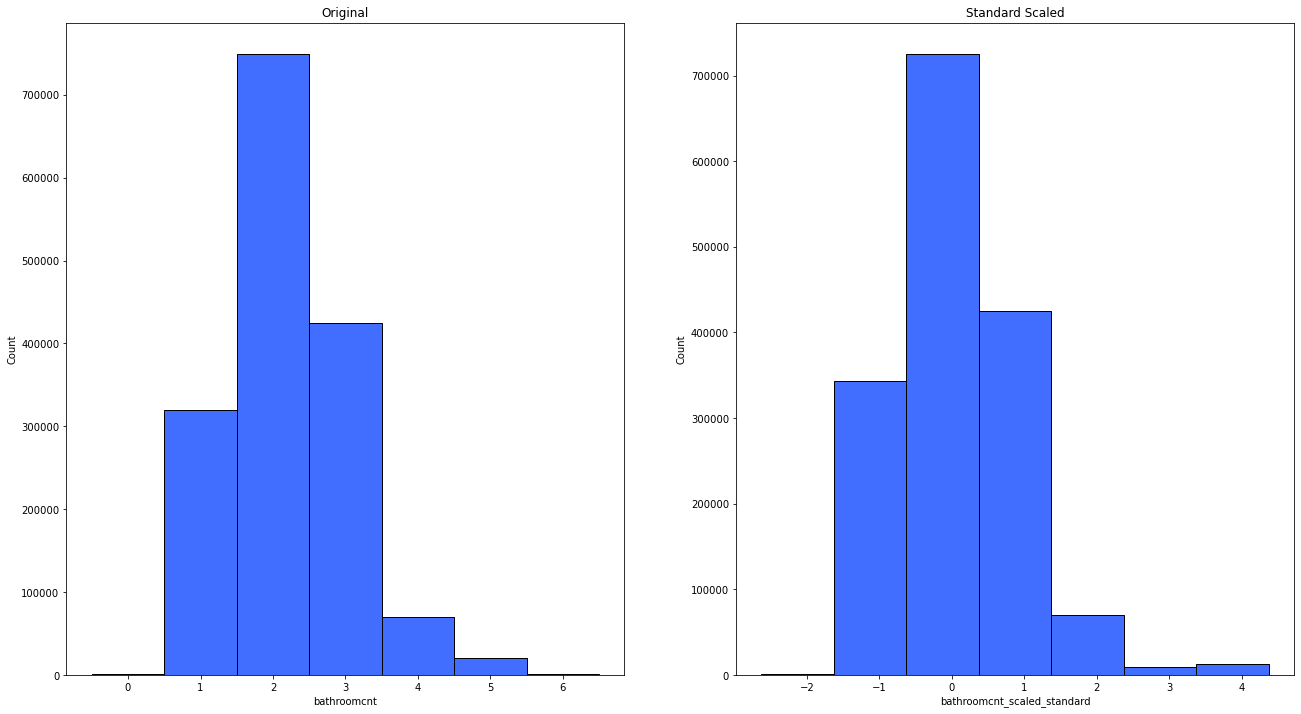

In [150]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(22, 12))

plt.subplot(121)
sns.histplot(train, x='bathroomcnt', discrete = True).set(Title = "Original")

plt.subplot(122)
sns.histplot(train, x='bathroomcnt_scaled_standard', binwidth = 1).set(Title = "Standard Scaled");

## Robust Scaler

In the Robust Scaler, scaled values are not influenced by a few outliers.

### Scale the data

In [151]:
# 1. create the object
scaler_robust = sklearn.preprocessing.RobustScaler()

# 2. fit the object
scaler_robust.fit(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

# 3. use the object
train[['calculatedfinishedsquarefeet_scaled_robust', 'bedroomcnt_scaled_robust', 'bathroomcnt_scaled_robust']] = scaler_robust.transform(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])
test[['calculatedfinishedsquarefeet_scaled_robust', 'bedroomcnt_scaled_robust', 'bathroomcnt_scaled_robust']] = scaler_robust.transform(test[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])
validate[['calculatedfinishedsquarefeet_scaled_robust', 'bedroomcnt_scaled_robust', 'bathroomcnt_scaled_robust']] = scaler_robust.transform(validate[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])


### Visualizations

#### Square Feet

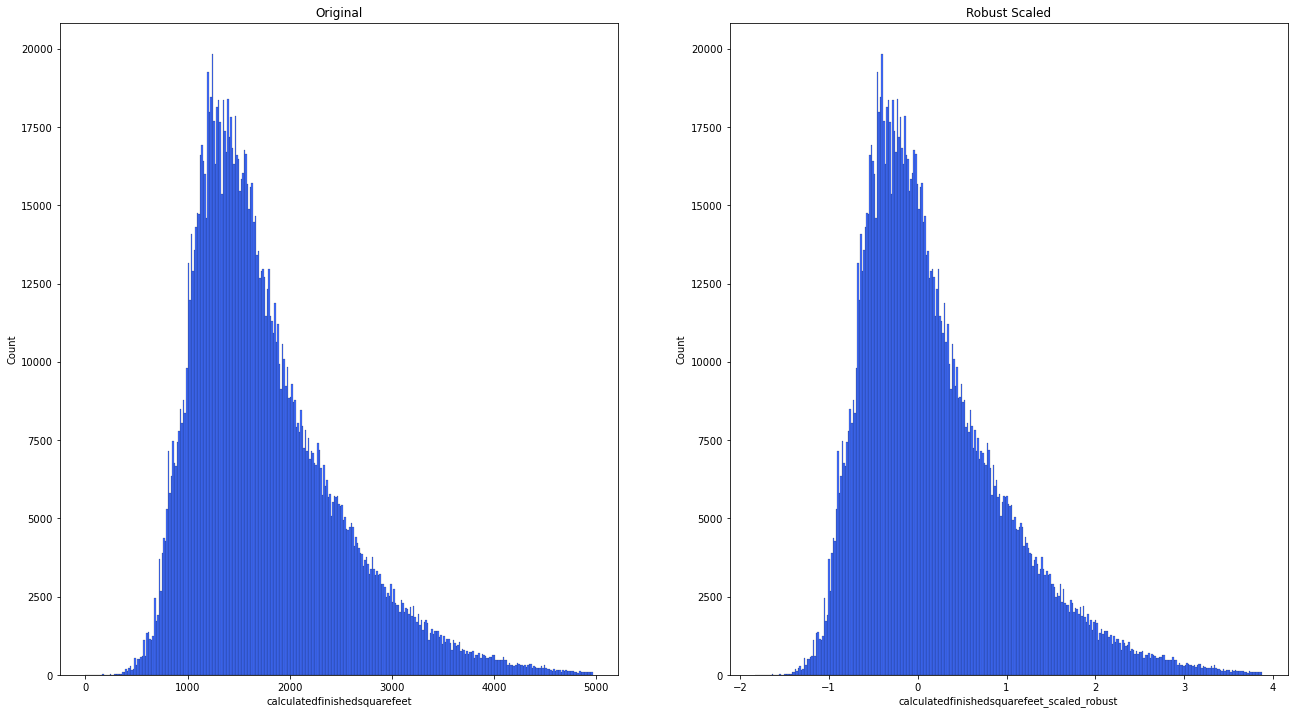

In [152]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(22, 12))
plt.subplot(121)
sns.histplot(train, x='calculatedfinishedsquarefeet').set(Title = "Original")
plt.subplot(122)
sns.histplot(train, x='calculatedfinishedsquarefeet_scaled_robust').set(Title = "Robust Scaled");

#### Bedroom Count

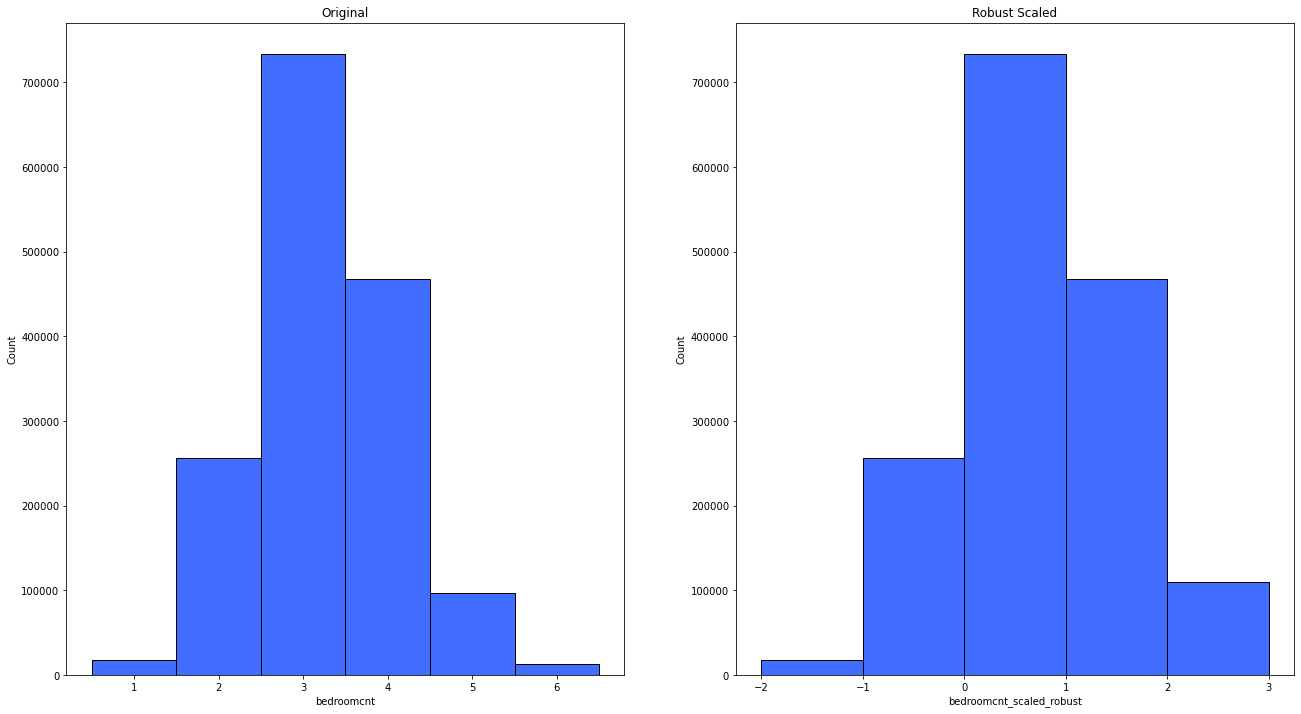

In [154]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(22, 12))
plt.subplot(121)
sns.histplot(train, x='bedroomcnt', discrete = True).set(Title = "Original")
plt.subplot(122)
sns.histplot(train, x='bedroomcnt_scaled_robust', binwidth = 1).set(Title = "Robust Scaled");

#### Bathroom Count

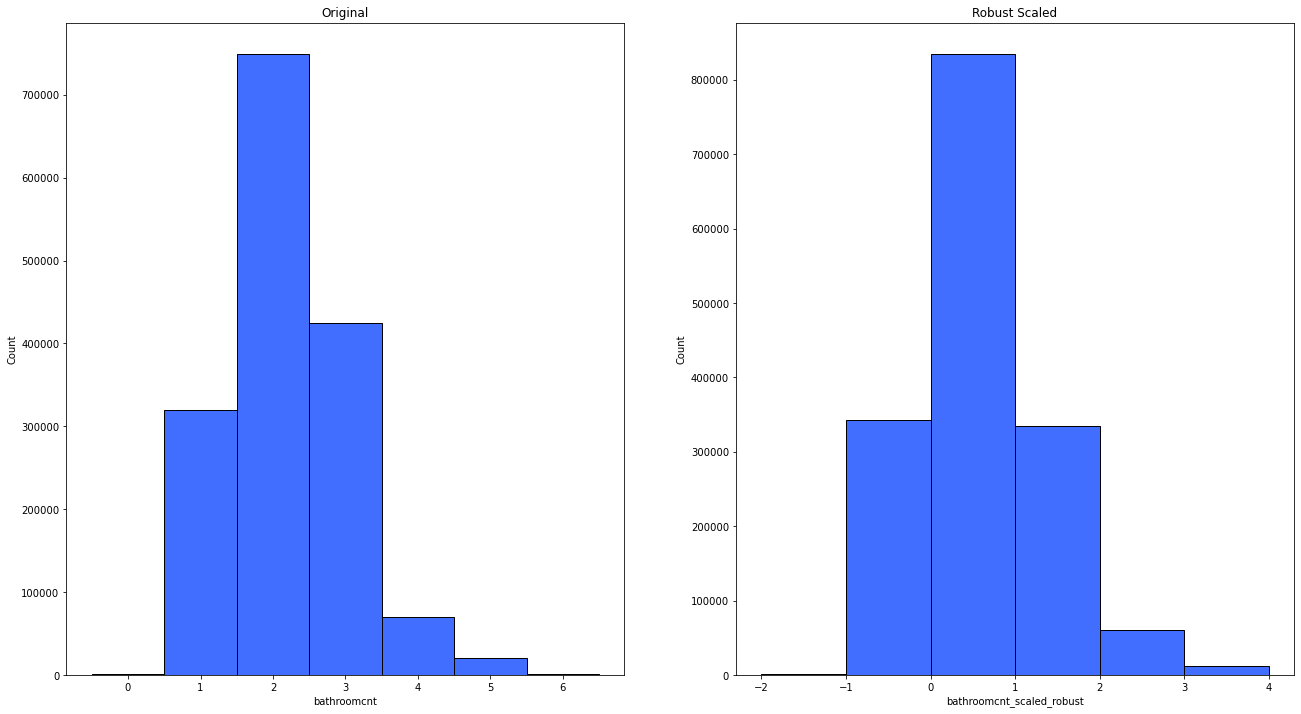

In [156]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(22, 12))
plt.subplot(121)
sns.histplot(train, x='bathroomcnt', discrete = True).set(Title = "Original")
plt.subplot(122)
sns.histplot(train, x='bathroomcnt_scaled_robust', binwidth = 1).set(Title = "Robust Scaled");

## Inverse Transform

Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

### Use Inverse Transform

In [160]:
originals_from_min_max = scaler.inverse_transform(train[['calculatedfinishedsquarefeet_scaled_min_max', 'bedroomcnt_scaled_min_max', 'bathroomcnt_scaled_min_max']])

### Check if Data is Equal to the Original 

In [162]:
originals_from_min_max == train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']]

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt
1562981,False,False,False
1703392,False,False,False
1243403,False,False,False
988579,False,False,False
403841,False,False,False
...,...,...,...
468556,False,False,False
804591,False,False,False
882648,False,False,False
1216252,False,False,False


We can conclude that, No! The resulting dataset is not the same as the original dataset.

## Non-linear Scaler

This scaler maps the probability density function of each feature to a uniform of Gaussian distribution.

We will start by scaling the data, specifiying a normal distribution.

### Scale the Data, Normal Distribution

In [168]:
# 1. create the object
scaler_quantile = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. fit the object
scaler_quantile.fit(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

# 3. use the object
train[['calculatedfinishedsquarefeet_scaled_quantile', 'bedroomcnt_scaled_quantile', 'bathroomcnt_scaled_quantile']] = scaler_quantile.transform(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])
test[['calculatedfinishedsquarefeet_scaled_quantile', 'bedroomcnt_scaled_quantile', 'bathroomcnt_scaled_quantile']] = scaler_quantile.transform(test[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])
validate[['calculatedfinishedsquarefeet_scaled_quantile', 'bedroomcnt_scaled_quantile', 'bathroomcnt_scaled_quantile']] = scaler_quantile.transform(validate[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

### Visualizations

#### Square Feet

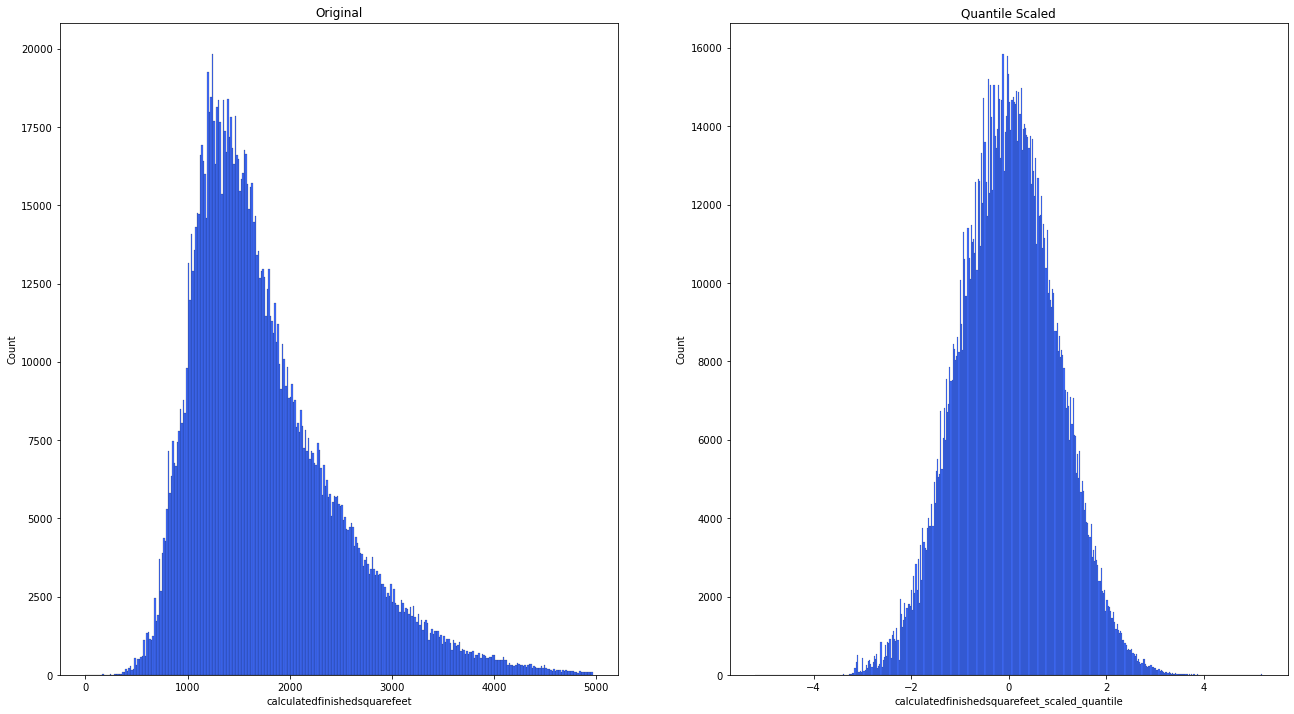

In [170]:
#plot the scaled and unscaled distribution
plt.figure(figsize=(22, 12))
plt.subplot(121)
sns.histplot(train, x='calculatedfinishedsquarefeet').set(Title = "Original")
plt.subplot(122)
sns.histplot(train, x='calculatedfinishedsquarefeet_scaled_quantile').set(Title = "Quantile Scaled");

#### Bedroom Count

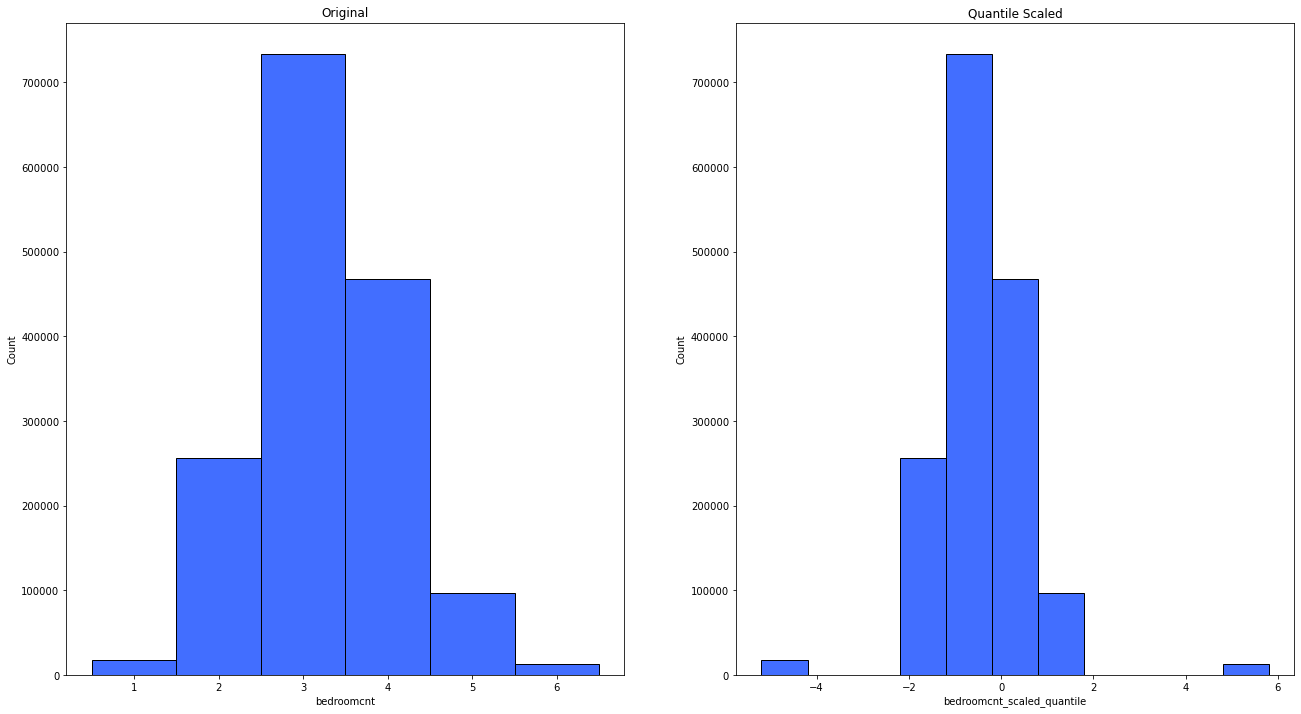

In [174]:
#plot the scaled and unscaled distribution
plt.figure(figsize=(22, 12))
plt.subplot(121)
sns.histplot(train, x='bedroomcnt', discrete = True).set(Title = "Original")
plt.subplot(122)
sns.histplot(train, x='bedroomcnt_scaled_quantile', binwidth = 1).set(Title = "Quantile Scaled");

#### Bathroom Count

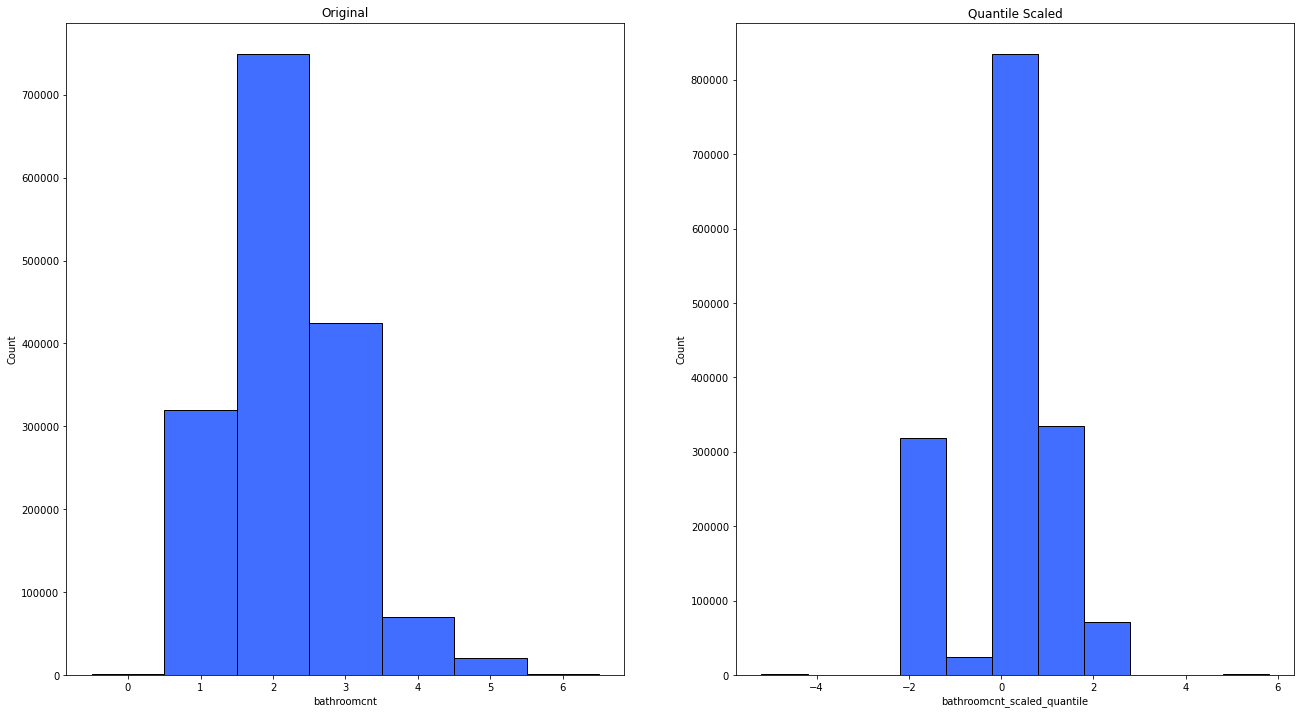

In [175]:
plt.figure(figsize=(22, 12))
plt.subplot(121)
sns.histplot(train, x='bathroomcnt', discrete = True).set(Title = "Original")
plt.subplot(122)
sns.histplot(train, x='bathroomcnt_scaled_quantile', binwidth = 1).set(Title = "Quantile Scaled");

Now we will use the `QuantileTransformer`, but omit the output_distribution argument.

### Scale the Data, not Normal

In [176]:
# 1. create the object
scaler = sklearn.preprocessing.QuantileTransformer()

# 2. fit the object
scaler.fit(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

# 3. use the object
train[['calculatedfinishedsquarefeet_scaled_quantile_not_normal', 'bedroomcnt_scaled_quantile_not_normal', 'bathroomcnt_scaled_quantile_not_normal']] = scaler.transform(train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])
test[['calculatedfinishedsquarefeet_scaled_quantile_not_normal', 'bedroomcnt_scaled_quantile_not_normal', 'bathroomcnt_scaled_quantile_not_normal']] = scaler.transform(test[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])
validate[['calculatedfinishedsquarefeet_scaled_quantile_not_normal', 'bedroomcnt_scaled_quantile_not_normal', 'bathroomcnt_scaled_quantile_not_normal']] = scaler.transform(validate[['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']])

### Visualizations

#### Square Feet

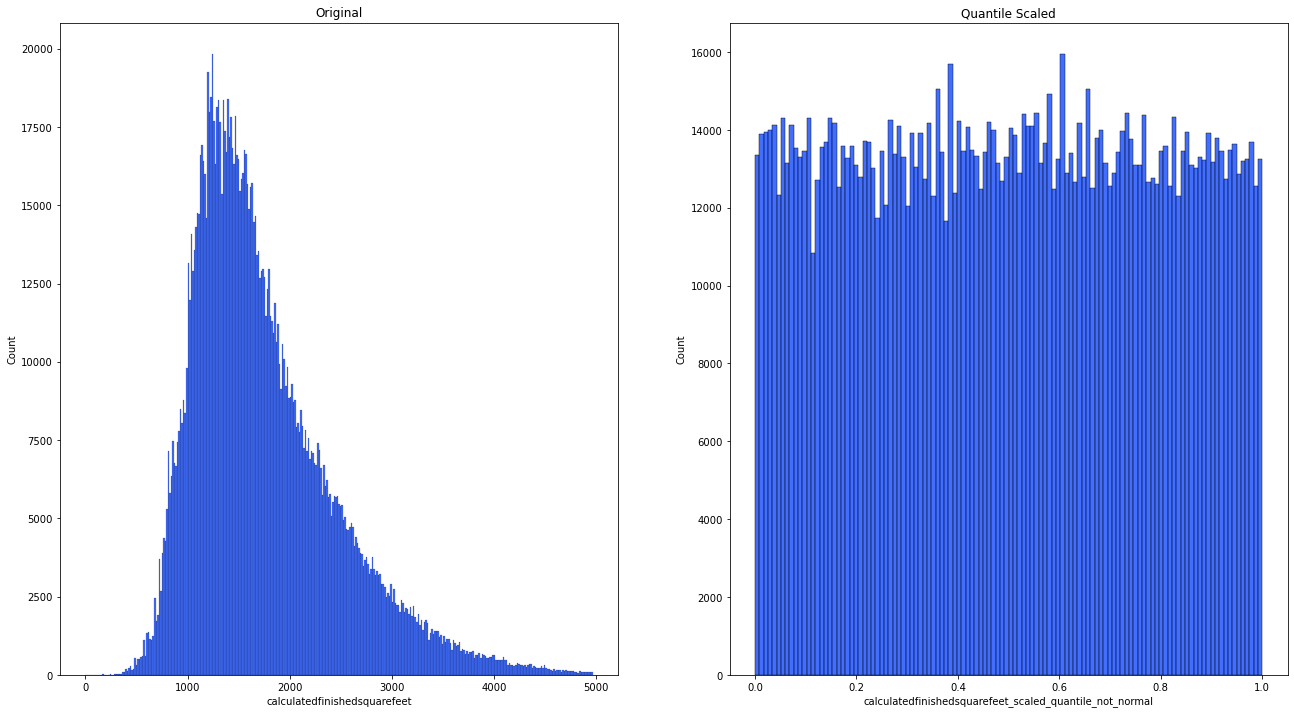

In [177]:
#plot the scaled and unscaled distribution
plt.figure(figsize=(22, 12))
plt.subplot(121)
sns.histplot(train, x='calculatedfinishedsquarefeet').set(Title = "Original")
plt.subplot(122)
sns.histplot(train, x='calculatedfinishedsquarefeet_scaled_quantile_not_normal').set(Title = "Quantile Scaled Not Normal");

#### Bedroom Count

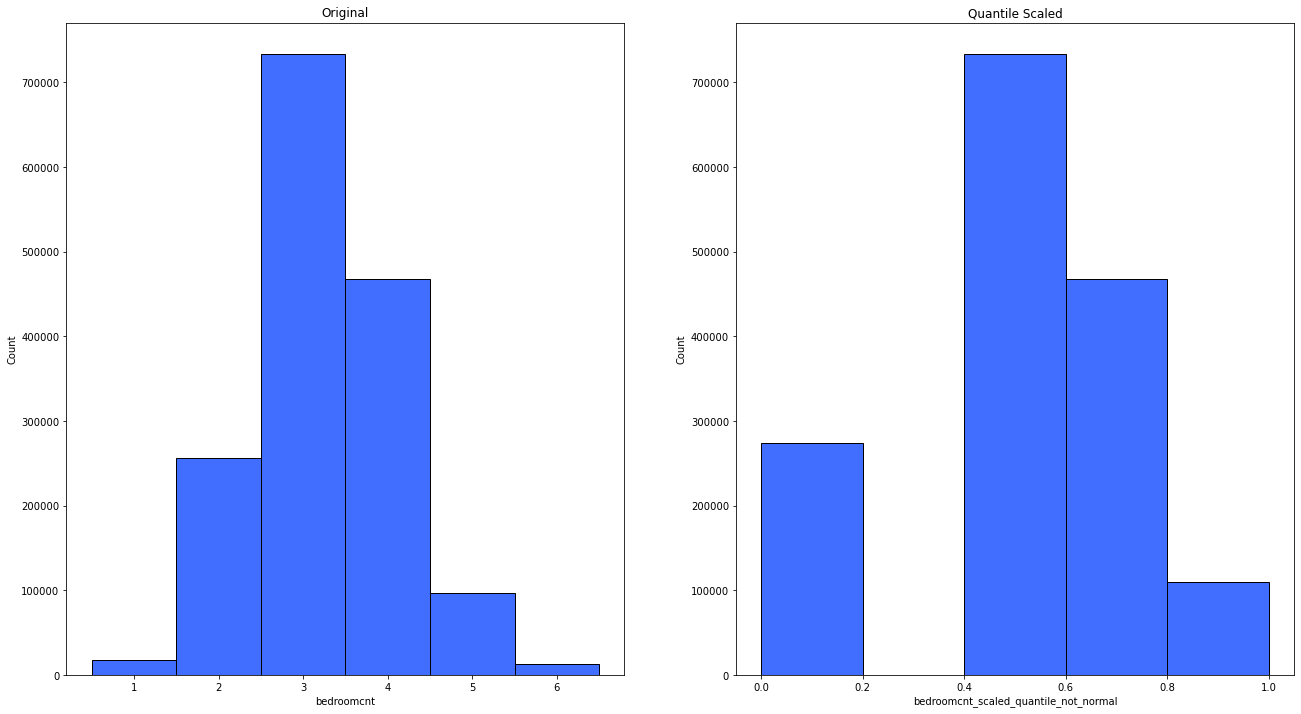

In [180]:
#plot the scaled and unscaled distribution
plt.figure(figsize=(22, 12))
plt.subplot(121)
sns.histplot(train, x='bedroomcnt', discrete = True).set(Title = "Original")
plt.subplot(122)
sns.histplot(train, x='bedroomcnt_scaled_quantile_not_normal', binwidth= 0.2).set(Title = "Quantile Scaled Not Normal");

#### Bathroom Count

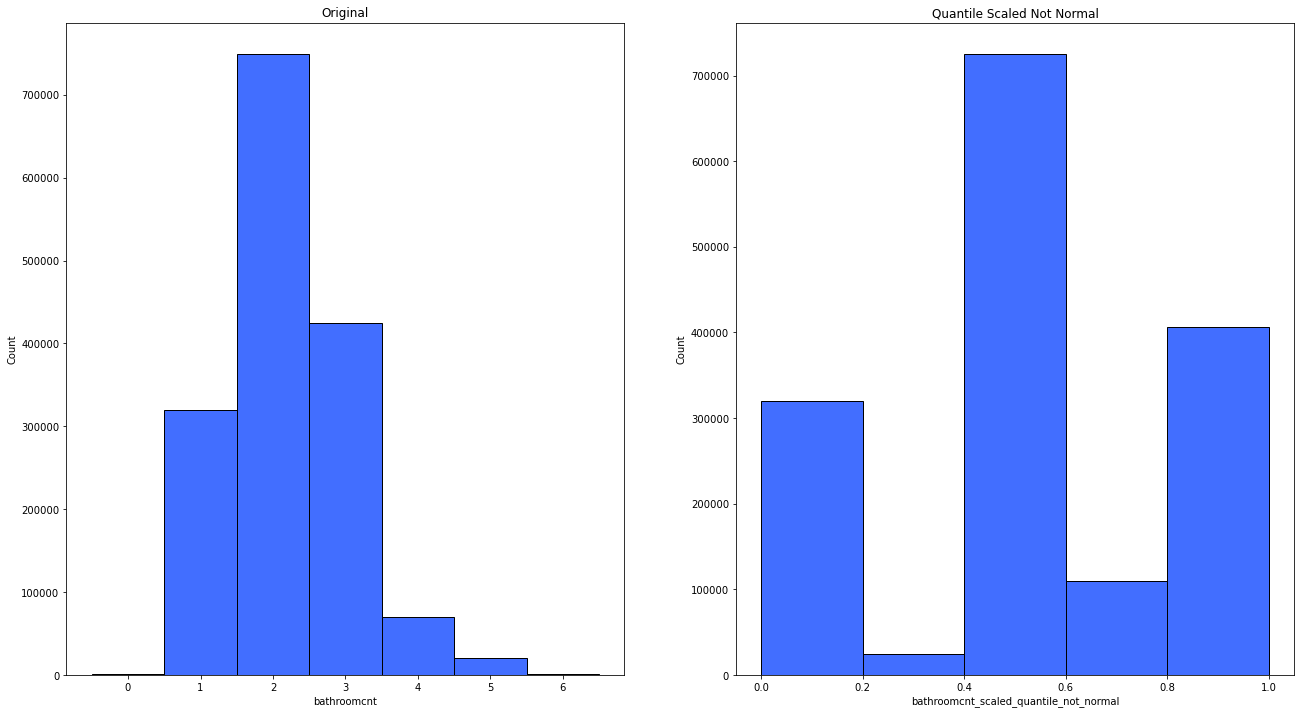

In [182]:
#plot the scaled and unscaled distribution
plt.figure(figsize=(22, 12))
plt.subplot(121)
sns.histplot(train, x='bathroomcnt', discrete = True).set(Title = "Original")
plt.subplot(122)
sns.histplot(train, x='bathroomcnt_scaled_quantile_not_normal', binwidth = 0.2).set(Title = "Quantile Scaled Not Normal");

## Key Takeaways

 - The three main methods of numeric scaling:
     - **Min and Max**,
     - **Robust**, and
     - **Standard**.
 - All three of these models are "equally good". In other words, you can choose whichever one you want. 
 - Quantile scaling produces different results, especially when the scaled data is not normalized.
 - These methods help us in modeling our data. Outside of modeling, we generally prefer unscaled data.